# SYS Module 

In [ ]:
import sys  # Import the sys module to access system-specific parameters and functions


# Use sys.executable to ensure that pip is run with the current Python interpreter
# Install the yfinance package, which is used for accessing financial data from Yahoo Finance
!{sys.executable} -m pip install yfinance

# Similarly, ensure that matplotlib is installed with the current Python interpreter
# Install the matplotlib package, a library for creating static, animated, and interactive visualizations in Python
!{sys.executable} -m pip install matplotlib

# Libraries 

In [46]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Add this import

# Yahoo Finance Data 

In [23]:
# Load the data
mks_data = yf.download('MKS.L', start='2022-11-01', end='2024-10-31')
fres_data = yf.download('FRES.L', start='2022-11-01', end='2024-10-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# MKS chart 

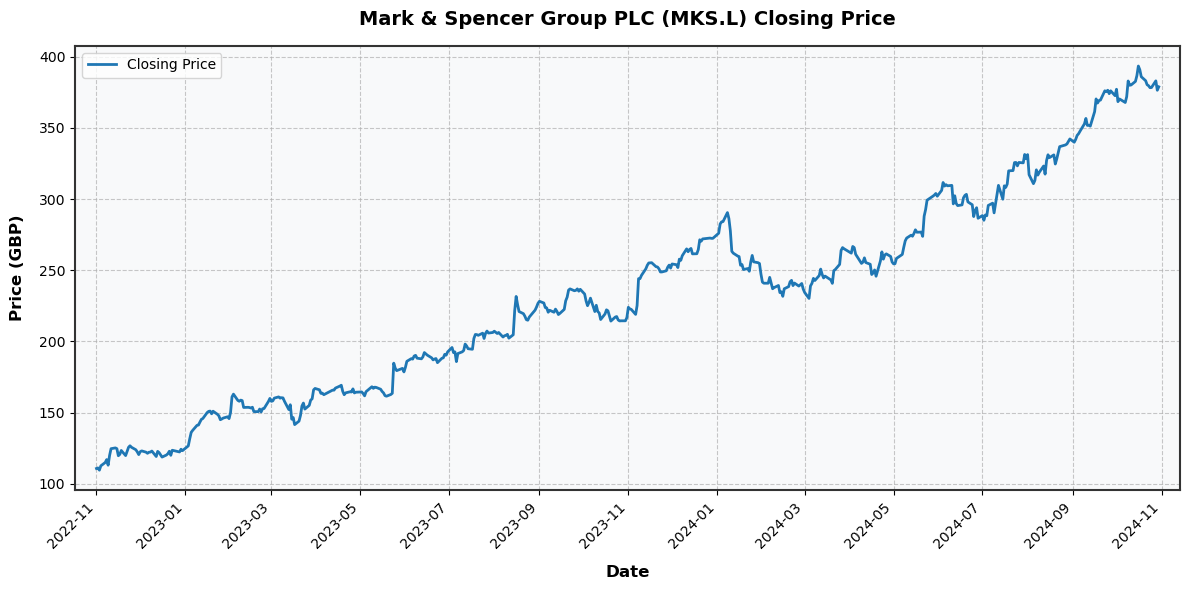

In [54]:
# Closing price plot for MKS with improved date formatting
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(mks_data['Close'], linewidth=2, color='#1f77b4')

# Format dates on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid and style
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f8f9fa')

# Improve labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Price (GBP)', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Mark & Spencer Group PLC (MKS.L) Closing Price', 
         fontsize=14, fontweight='bold', pad=15)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add margins for better spacing
plt.margins(x=0.02)

# Enhance spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

# Add legend

plt.legend(['Closing Price'], loc='upper left')
plt.show()

# MKS Annualised Average Returns 

In [15]:
# MKS Annualised average returns

mks_adj_close_yesterday = mks_data.iloc[1:]['Adj Close'].values 
mks_adj_close_today = mks_data['Adj Close'].iloc[:-1].values
mks_daily_returns = (mks_adj_close_yesterday - mks_adj_close_today) / mks_adj_close_today
average_mks_daily_return = mks_daily_returns.mean()
mks_annualized_return = average_mks_daily_return * 252

print(mks_annualized_return)

0.6601787942534045


# MKS Annualised volatility

In [16]:
# MKS Annualised volatility

average_mks_daily_volatility = mks_daily_returns.std()
mks_annualized_volatility = average_mks_daily_volatility * (252 ** 0.5)

print(mks_annualized_volatility)

0.2830288270860836


# FRES chart 

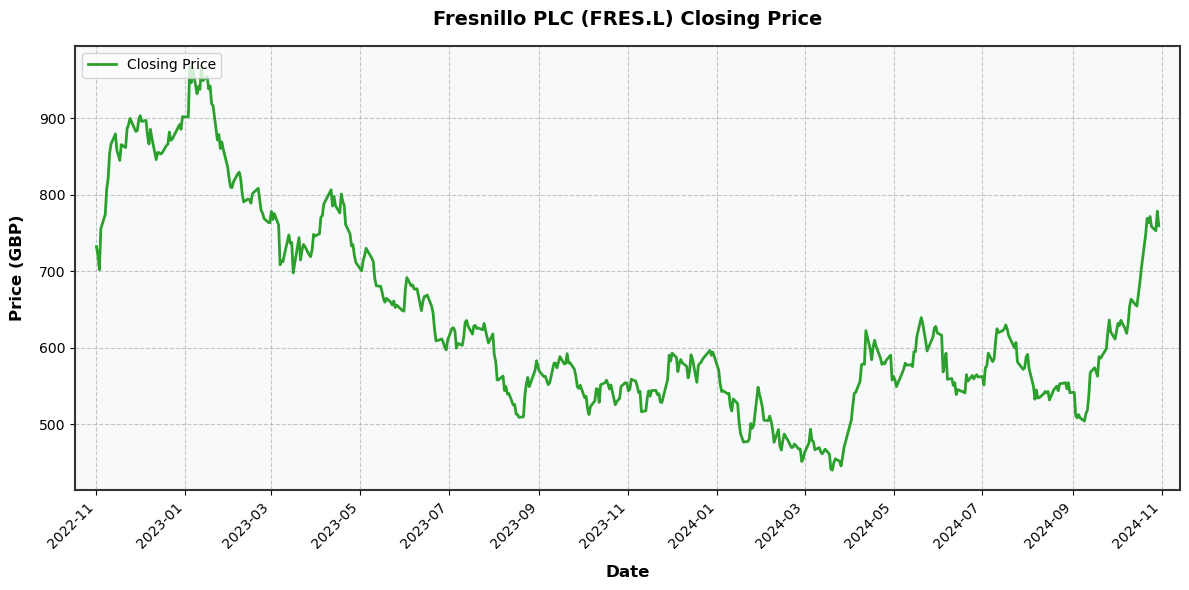

In [52]:
# Create figure and axis objects with a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data with improved styling
plt.plot(fres_data['Close'], linewidth=2, color='#2ca02c')

# Format dates on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid and style
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f8f9fa')

# Improve labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Price (GBP)', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Fresnillo PLC (FRES.L) Closing Price', 
         fontsize=14, fontweight='bold', pad=15)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add margins for better spacing
plt.margins(x=0.02)

# Enhance spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

# Add legend
plt.legend(['Closing Price'], loc='upper left')

plt.show()

# FRES Annualised Average Returns

In [14]:
# FRES Annualised average returns

fres_adj_close_yesterday = fres_data.iloc[1:]['Adj Close'].values 
fres_adj_close_today = fres_data['Adj Close'].iloc[:-1].values
fres_daily_returns = (fres_adj_close_yesterday - fres_adj_close_today) / fres_adj_close_today
average_fres_daily_return = fres_daily_returns.mean()
fres_annualized_return = average_fres_daily_return * 252

print(fres_annualized_return)

0.0961912383642253


# FRES Annualised volatility

In [17]:
# FRES Annualised volatility

average_fres_daily_volatility = fres_daily_returns.std()
fres_annualized_volatility = average_fres_daily_volatility * (252 ** 0.5)

print(fres_annualized_volatility)

0.3532423517104182
